### Input probability distribution examples

Any distribution implemented by the scipy.stats module can be used in the uncertainty calculator.
(See http://docs.scipy.org/doc/scipy/reference/stats.html)
Custom distributions can also be implemented by subclassing rv_continuous or rv_discrete.
See Curvilinear Trapezoidal distribution in customdists.py for an example of subclassing.

Below are examples of some common distributions.
All distributions take a loc and scale parameter that move and stretch the distribution.
For Gaussian distributions, loc is equivalent to mean and scale to standard deviaion.
Dotted curve shows a Gaussian with same mean and standard deviation as the distribution.


In [1]:
%matplotlib inline
import suncal
import numpy as np
import matplotlib.pyplot as plt

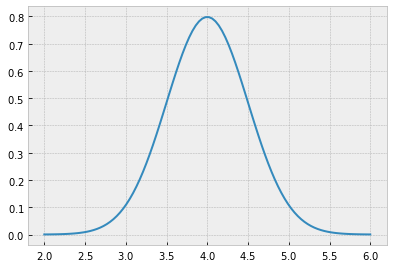

In [2]:
# Gaussian, parameter mean and std (equivalently loc and scale)
u = suncal.InputUncert('u', dist='gaussian', nom=4, std=0.5)
x, y = u.pdf()
plt.plot(x.magnitude, y);

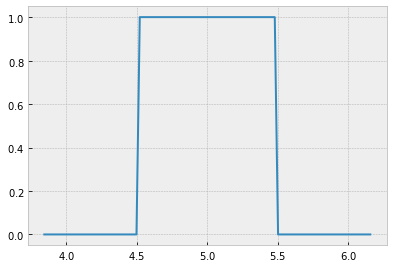

In [3]:
# Uniform, overridden by customdists.py so that a is half-width and nom is center
u = suncal.InputUncert('u', dist='uniform', nom=5, a=0.5)
x, y = u.pdf()
plt.plot(x.magnitude, y);


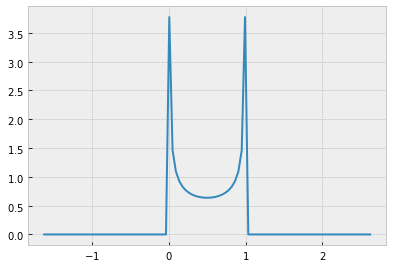

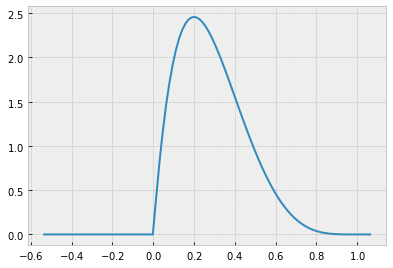

In [4]:
# Beta, parameters a and b
u = suncal.InputUncert('u', dist='beta', loc=0, a=.5, b=.5)
x, y = u.pdf(stds=6)
plt.plot(x.magnitude, y);

plt.figure()
u = suncal.InputUncert('u', dist='beta', loc=0, a=2, b=5)
x, y = u.pdf(stds=5)
plt.plot(x.magnitude, y);

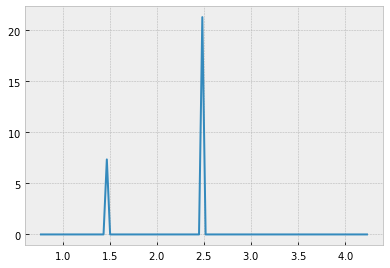

In [5]:
# Bernoulli, parameter df (degrees of freedom)
u = suncal.InputUncert('u', dist='bernoulli', nom=0.5, p=.75)
x, y = u.pdf(stds=4)
plt.plot(x.magnitude, y);

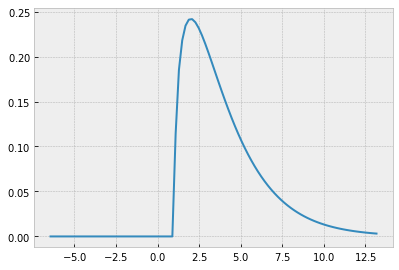

In [6]:
# Chi-squared, parameter df (degrees of freedom)
u = suncal.InputUncert('u', dist='chi2', df=3)
x, y = u.pdf(stds=4)
plt.plot(x.magnitude, y);

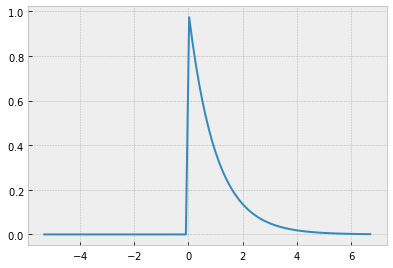

In [7]:
# Exponential, parameters loc and scale
u = suncal.InputUncert('u', dist='expon', loc=5, scale=2)
x, y = u.pdf(stds=6)
plt.plot(x.magnitude, y);

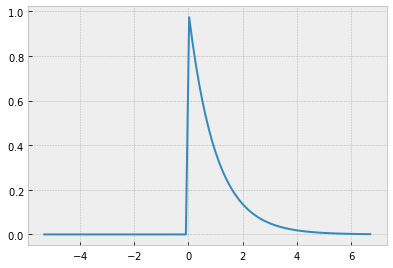

In [8]:
# Gamma, parameter a (shape)
u = suncal.InputUncert('u', dist='gamma', loc=2, a=3)
x, y = u.pdf(stds=6)
plt.plot(x.magnitude, y);

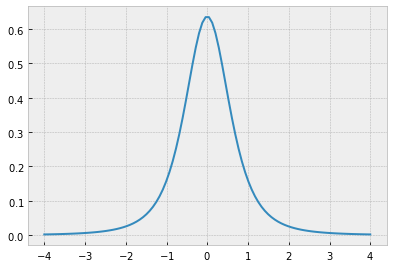

In [9]:
# Student's T,
u = suncal.InputUncert('u', dist='t', df=3)
x, y = u.pdf()
plt.plot(x.magnitude, y);

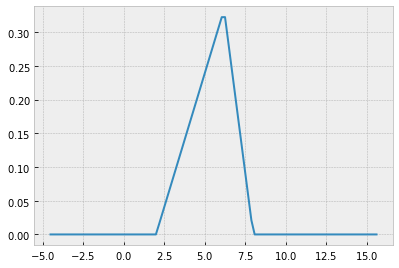

In [10]:
# Triangular, parameter c (shape) - rises from loc to loc + c *scale and falls to loc + scale
u = suncal.InputUncert('u', dist='triang', c=.7, loc=2, scale=6)
x, y = u.pdf(stds=8)
plt.plot(x.magnitude, y);

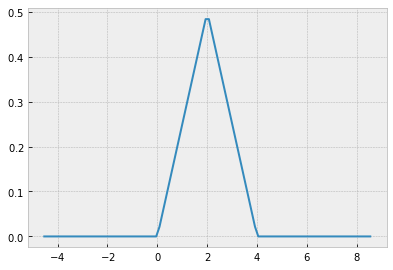

In [11]:
# Triangular, symmetric. Customized in customdists.py so that loc = center and a = half-width.
u = suncal.InputUncert('u', dist='triangular', nom=2, a=2)
x, y = u.pdf(stds=8)
plt.plot(x.magnitude, y);

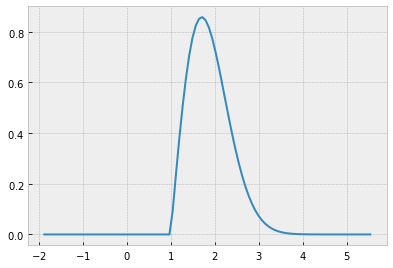

In [12]:
# Weibull, parameters a and c
u = suncal.InputUncert('u', dist='exponweib', a=1, c=2)
x, y = u.pdf(stds=8)
plt.plot(x.magnitude, y);

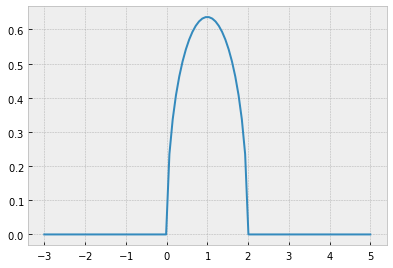

In [13]:
# Semicircular
u = suncal.InputUncert('u', dist='semicircular')
x, y = u.pdf(stds=8)
plt.plot(x.magnitude, y);

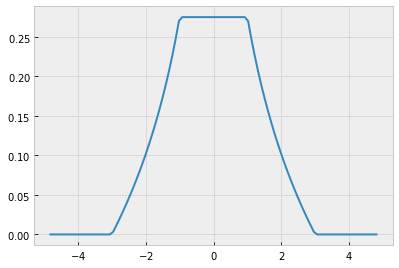

In [14]:
# Curvilinear Trapezoid (See GUM-Supplement 1)
u = suncal.InputUncert('u', dist='curvtrap', a=2, d=1)
x, y = u.pdf(stds=4)
plt.plot(x.magnitude, y);

If you have a set of sampled data, the 'hist' distribution can be used to approximate the distribution using piecewise PDF.

If you have a discrete PDF function, it can be used using the 'piecewise' distribution.

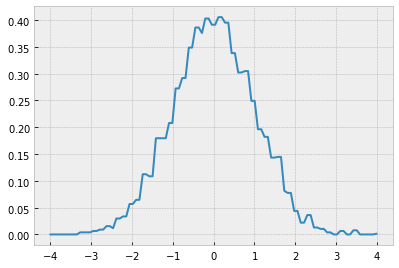

In [15]:
# Approximate the PDF using sampled data
data = np.random.normal(loc=0, scale=1, size=5000)
u = suncal.InputUncert('u', dist='hist', data=data)
x, y = u.pdf(stds=4)
plt.plot(x.magnitude, y);

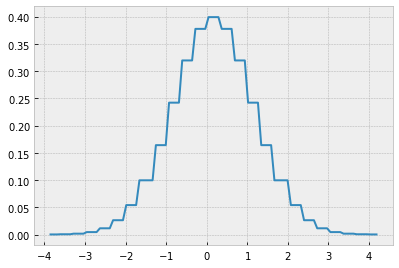

In [16]:
# Approximate the PDF using x, y data
pdfx = np.linspace(-4, 4, num=25)
pdfy = 1/(2*np.pi) * np.exp(-pdfx**2/2)
u = suncal.InputUncert('u', dist='piecewise', x=pdfx, pdf=pdfy)
x, y = u.pdf(stds=4)
plt.plot(x.magnitude, y);